#### Methods and models for multivariate analysis. Lab 1

In [1]:
# Libraries import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.mixture import GaussianMixture

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 12.0
pd.set_option('display.max_columns', None)

#### Data load and transformation

In [2]:
df = pd.read_csv('MSFT.csv', error_bad_lines=False,encoding= 'unicode_escape')
df

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA50,EMA100,EMA200,MACD,MACD_EMA,ATR,ADX,CCI,ROC,RSI,William%R,SO%K,STD5,ForceIndex1,ForceIndex20,Date_col,Day,DayofWeek,DayofYear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,17.97,17.98,17.80,17.86,46924400,0.384549,19.023098,17.484902,17.97,17.91,17.70,17.81,17.99,17.844,17.911,18.2540,19.0262,18.58480,17.891061,17.891061,17.891061,17.891061,17.891061,-0.341530,-0.329186,0.271273,40.465948,1333.333333,-3.823371,33.044146,-84.251969,15.748031,0.007260,-5161684.0,-50209108.0,2005-10-17,17,0,290,42,0,0,0,0,0,0,0,2005,10,33.65,33.55,33.30,33.61,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,17.89
1,2005-10-18,17.83,18.08,17.80,17.89,69328200,0.368394,18.944289,17.470711,17.86,17.97,17.91,17.78,17.97,17.866,17.881,18.2075,18.9900,18.57780,17.890708,17.890708,17.890708,17.890708,17.890708,-0.328778,-0.329105,0.271897,39.942915,1333.333333,-1.649258,34.265354,-81.889764,18.110236,0.007153,2079846.0,-64475226.0,2005-10-18,18,1,291,42,0,0,0,0,0,0,0,2005,10,33.42,33.65,33.55,33.44,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,18.27
2,2005-10-19,17.88,18.27,17.84,18.27,66574500,0.359387,18.911774,17.474226,17.89,17.86,17.97,17.70,17.83,17.980,17.911,18.1930,18.9582,18.57230,18.017138,18.017138,18.017138,18.017138,18.017138,-0.284726,-0.320229,0.283190,38.148273,1333.333333,1.669449,47.361696,-50.806452,49.193548,0.010470,25298310.0,-19306605.0,2005-10-19,19,2,292,42,0,0,0,0,0,0,0,2005,10,34.09,33.42,33.65,33.05,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,18.05
3,2005-10-20,18.24,18.30,18.02,18.05,58830600,0.355440,18.883881,17.462119,18.27,17.89,17.86,17.91,17.88,18.008,17.915,18.1730,18.9278,18.56595,18.028092,18.028092,18.028092,18.028092,18.028092,-0.264518,-0.309087,0.282962,36.294267,1333.333333,0.222099,42.128624,-63.888889,36.111111,0.012595,-12942732.0,-23532240.0,2005-10-20,20,3,293,42,0,0,0,0,0,0,0,2005,10,33.77,34.09,33.42,33.30,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,18.05
4,2005-10-21,18.14,18.21,17.89,18.05,69431200,0.352278,18.860056,17.450944,18.05,18.27,17.89,17.97,18.24,18.024,17.929,18.1555,18.8928,18.55970,18.035395,18.035395,18.035395,18.035395,18.035395,-0.245671,-0.296404,0.285607,35.177496,1333.333333,0.781686,42.128624,-53.012048,46.987952,0.012569,0.0,-24300920.0,2005-10-21,21,4,294,42,0,0,0,0,0,0,0,2005,10,33.98,33.77,34.09,33.55,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,18.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,2020-08-07,214.85,215.70,210.93,212.48,27789600,4.893286,217.618572,198.045428,216.35,212.94,213.29,205.01,212.34,214.320,209.044,207.8320,201.0002,171.71495,212.673974,212.673974,212.673974,212.673974,212.673974,3.181860,2.765197,5.569604,21.196988,1333.333333,5.553900,56.846318,-25.633383,74.366617,0.030344,-107545752.0,-33069624.0,2020-08-07,7,4,220,32,0,0,0,0,0,0,1,2020,8,271.47,274.64,271.05,265.79,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,208.25
3728,2020-08-10,211.67,211.88,206.35,208.25,36716500,4.890728,217.672456,198.109544,212.48,216.35,212.94,216.54,214.85,212.662,209.484,207.8910,201.5002,172.07610,211.199316,211.199316,211.199316,211.199316,211.199316,2.794806,2.771119,5.609632,20.439443,1333.333333,2.158450,51.646242,-46.646796,53.353204,0.015044,-155310795.0,43325470.0,2020-08-10,10,0,223,33,0,0,0,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3732 non-null   object 
 1   Open              3732 non-null   float64
 2   High              3732 non-null   float64
 3   Low               3732 non-null   float64
 4   Close(t)          3732 non-null   float64
 5   Volume            3732 non-null   int64  
 6   SD20              3732 non-null   float64
 7   Upper_Band        3732 non-null   float64
 8   Lower_Band        3732 non-null   float64
 9   S_Close(t-1)      3732 non-null   float64
 10  S_Close(t-2)      3732 non-null   float64
 11  S_Close(t-3)      3732 non-null   float64
 12  S_Close(t-5)      3732 non-null   float64
 13  S_Open(t-1)       3732 non-null   float64
 14  MA5               3732 non-null   float64
 15  MA10              3732 non-null   float64
 16  MA20              3732 non-null   float64


In [4]:
df.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA50,EMA100,EMA200,MACD,MACD_EMA,ATR,ADX,CCI,ROC,RSI,William%R,SO%K,STD5,ForceIndex1,ForceIndex20,Day,DayofWeek,DayofYear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,3732.000000,3732.000000,3732.000000,3732.000000,3.732000e+03,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3.732000e+03,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3.732000e+03,3.732000e+03,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.0,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.00000
mean,48.358915,48.820691,47.879879,48.375560,4.823395e+07,1.151065,50.192147,45.587885,48.324453,48.273199,48.223446,48.120247,48.307615,48.273814,48.144309,47.890016,47.140914,43.970086,48.273280,48.273280,48.273280,48.273280,48.273280,0.350726,0.347856,1.014750,24.024410,1.333333e+03,0.765626,54.460557,-41.512583,58.487417,0.014276,3.716916e+05,1.908676e+07,15.746249,2.022240,182.881833,26.521168,0.033762,0.030279,0.010450,0.008039,0.002680,0.0,0.244105,2012.706592,6.515005,88.168998,88.104976,88.041053,87.851645,87.882907,87.573303,86.677655,1802.140268,1801.554293,1799.223352,16115.084448,16110.365965,16091.619116,48.42675
std,42.468453,42.912174,41.976828,42.484718,2.981260e+07,1.480610,43.991182,39.477485,42.406452,42.327492,42.254189,42.092838,42.389381,42.318385,42.105363,41.690277,40.448340,35.794311,42.311922,42.311922,42.311922,42.311922,42.311922,1.078054,1.010257,1.224458,9.933706,3.353502e-13,4.556153,11.740350,29.313488,29.313488,0.010986,9.220280e+07,2.507258e+08,8.750061,1.399846,104.866334,14.969721,0.180640,0.171376,0.101704,0.089309,0.051702,0.0,0.429613,4.294933,3.433644,56.253648,56.179742,56.106276,55.892295,55.901003,55.530655,54.491380,649.993978,649.562660,647.877979,5605.625910,5603.116874,5593.480623,42.56296
min,11.710000,12.030000,11.450000,11.670000,7.425600e+06,0.134613,13.719004,11.093989,11.670000,11.670000,11.670000,11.670000,11.710000,11.968000,12.283000,12.666000,13.481000,15.527700,11.946229,11.946229,11.946229,11.946229,11.946229,-8.814370,-7.115432,0.216926,7.483195,1.333333e+03,-21.629621,16.902208,-100.000000,0.000000,0.000594,-2.052603e+09,-4.332882e+09,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2005.000000,1.000000,22.770000,22.770000,22.770000,22.770000,24.048000,24.828500,25.837200,676.530000,676.530000,676.530000,6547.050000,6547.050000,6547.050000,11.67000
25%,21.210000,21.430000,21.010000,21.207500,2.801850e+07,0.440017,22.238191,20.101007,21.200000,21.200000,21.200000,21.200000,21.207500,21.202500,21.203250,21.183250,21.254150,20.989363,21.197417,21.197417,21.197417,21.197417,21.197417,-0.125594,-0.113491,0.418294,16.532189,1.333333e+03,-1.546220,46.539995,-65.610072,34.389928,0.007848,-9.250679e+06,-2.756024e+07,8.000000,1.000000,92.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2009.000000,4.000000,41.477500,41.465000,41.447500,41.420000,41.364500,41.257750,41.123750,1288.135000,1288.057500,1287.237500,11667.017500,11659.415000,11642.605000,21.21750
50%,26.595000,26.875000,26.370000,26.590000,4.244665e+07,0.671721,27.685148,25.069210,26.585000,26.570000,26.540000,26.520000,26.585000,26.538000,26.493000,26.220000,25.888000,24.887475,26.5475

In [5]:
df = df.convert_dtypes()
pick_columns = ['MACD', 'ADX', 'Week', 'ROC']
sub_df = df[pick_columns]
sub_df

,MACD,ADX,Week,ROC
0,-0.34153,40.465948,42,-3.823371
1,-0.328778,39.942915,42,-1.649258
2,-0.284726,38.148273,42,1.669449
3,-0.264518,36.294267,42,0.222099
4,-0.245671,35.177496,42,0.781686
...,...,...,...,...
3727,3.18186,21.196988,32,5.5539
3728,2.794806,20.439443,33,2.15845
3729,2.071219,19.042638,33,0.673201
3730,1.944178,18.254498,33,2.513966


In [6]:
sub_df.describe()

,MACD,ADX,Week,ROC
count,3732.000000,3732.000000,3732.000000,3732.000000
mean,0.350726,24.024410,26.521168,0.765626
std,1.078054,9.933706,14.969721,4.556153
min,-8.814370,7.483195,1.000000,-21.629621
25%,-0.125594,16.532189,14.000000,-1.546220
50%,0.191816,22.078619,26.000000,0.958928
75%,0.560338,29.754491,40.000000,3.391111
max,6.838893,60.111882,53.000000,22.852081


#### Non-parametric estimation of PDF

In [7]:
n_bins = np.log10(sub_df.shape[0])*5
n_bins_ = 1 + 3.32*np.log10(sub_df.shape[0])
print ("number of columns for histogram:", n_bins.round(), n_bins_.round() )

number of columns for histogram: 18.0 13.0


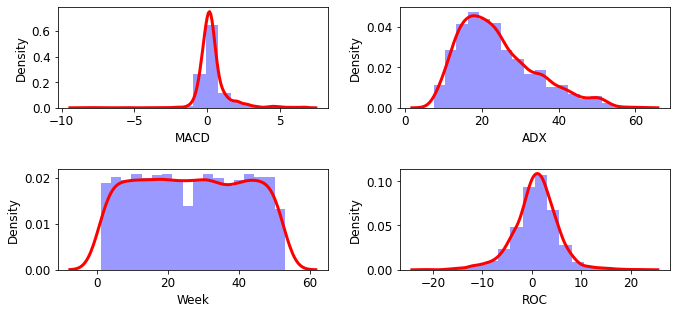

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5),squeeze=False)
fig.tight_layout(pad=3.0)
axs = axs.flat

for num, col in enumerate(list(sub_df.columns)):
    sns.distplot(sub_df[col], kde=True, norm_hist=True, bins=18, ax=axs[num],
                 kde_kws={"color": "r", "lw": 3, "label": "KDE"},
                 hist_kws={"color": "blue"})

#### Box-plot (plot with whiskers)

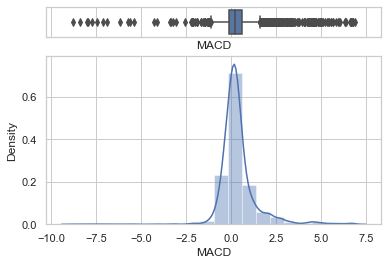

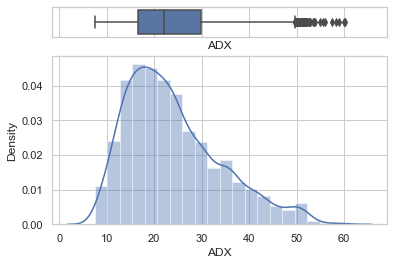

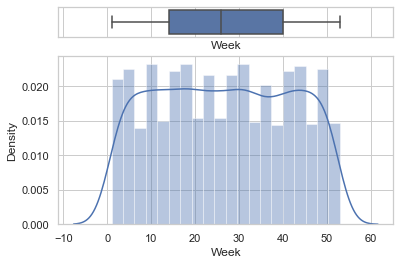

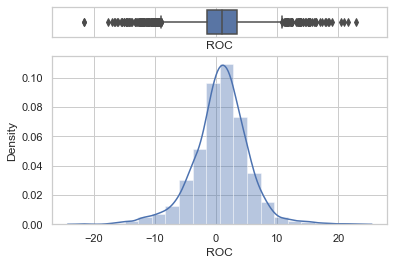

In [9]:
for col in sub_df:
    df_col = sub_df[col]
    sns.set(style="whitegrid") 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df_col, ax=ax_box)
    sns.distplot(df_col, ax=ax_hist, bins=20) 
    plt.show()
    


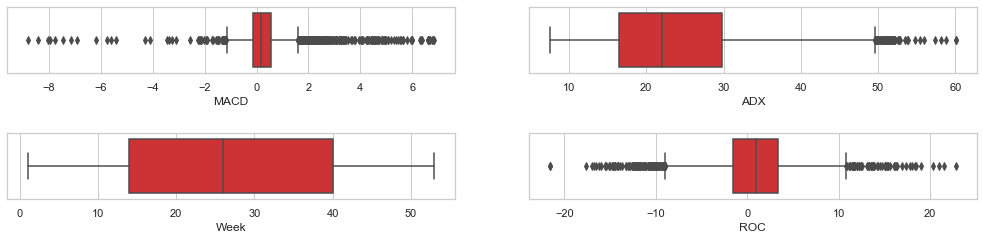

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(15, 4),squeeze=False)
fig.tight_layout(pad=3.0)
axs=axs.flat
for num, col in enumerate(list(sub_df.columns)):
    sns.boxplot(x = col, data = df, ax=axs[num], palette="Set1")

In [11]:

#calculate interquartile range (IQR) for the columns
for item in sub_df:
    q3, q1 = np.percentile(df[item], [75 ,25])
    iqr = q3 - q1
    print(f'IRQ for {item}: {iqr}')

IRQ for MACD: 0.6859322166281352
IRQ for ADX: 13.222301589495864
IRQ for Week: 26.0
IRQ for ROC: 4.937331337845178


#### Theoretical distribution of sample

In [12]:
def fit_funct(data, var, distr, test = scipy.stats.kstest):
    
    # The distribution parameters are determined using the fit function
    x = np.linspace(np.min(data[var]), np.max(data[var]))
    data_float = np.array(data[var], dtype=float) 
    params = getattr(scipy.stats, distr).fit(data_float)
    ks = test(data_float, distr, params)
    
    return ks

def test_d(data, var, distributions, test = scipy.stats.kstest):
    
    print(f'{var}:')
    for distr in distributions:
        
        ks = fit_funct(data, var, distr, test = test)
        if ks.pvalue > 0.05:
            print(f'Test pvalue: {ks.pvalue}. Hypophesis for distribution {distr} can be accepted')
            
    print('-----------------')

# Obtain all possible continuios distributions
dist_continu = [d for d in dir(scipy.stats) if
                isinstance(getattr(scipy.stats, d), scipy.stats.rv_continuous)]


unwanted = {'kstwo', 'levy_stable', 'studentized_range'}
dist_continu = [item for item in dist_continu if item not in unwanted]

print("Kstest results \n------------------")
for var in sub_df:
    test_d(sub_df, var, dist_continu, test = scipy.stats.kstest)

    
print('Cramer von Mises test \n----------------')
for var in sub_df:
    test_d(sub_df, var, dist_continu, test = scipy.stats.cramervonmises)


Kstest results 
------------------
MACD:
Test pvalue: 0.1689057673871065. Hypophesis for distribution genhyperbolic can be accepted
Test pvalue: 0.13813643962530497. Hypophesis for distribution johnsonsu can be accepted
Test pvalue: 0.13392636889824383. Hypophesis for distribution nct can be accepted
Test pvalue: 0.13032300261901408. Hypophesis for distribution norminvgauss can be accepted
-----------------
ADX:
Test pvalue: 0.05172586766688614. Hypophesis for distribution chi2 can be accepted
Test pvalue: 0.05174653474606661. Hypophesis for distribution erlang can be accepted
Test pvalue: 0.07856761694670023. Hypophesis for distribution exponweib can be accepted
Test pvalue: 0.06515217572868037. Hypophesis for distribution f can be accepted
Test pvalue: 0.05171178277444011. Hypophesis for distribution gamma can be accepted
Test pvalue: 0.07334636916893622. Hypophesis for distribution gausshyper can be accepted
Test pvalue: 0.05175127207957175. Hypophesis for distribution pearson3 can 

#### We obtain possible distribution for all samples, however, if we could not obtain some results, we could split distribution to parts by, for example, GMM

#### Lets calculate parameters with MLE and LS for best suitable distributions (with the best pvalue), estimate them with statistical tests and plot QQ biplots

##### Column 'ADX' - Skewnorm distribution

In [13]:
def pdf_plot(data, distr, parameters_mle, parameters_lsm, distr_name, column_name, bins = 20):
    
    data = np.array(data, dtype = float) 
    
    plt.hist(data, bins=bins, density=True)
    xs = np.arange(data.min(), data.max(), 0.01)
    plt.plot(xs, distr.pdf(xs, *parameters_mle), label='MLE', linewidth = 1.2)
    plt.plot(xs, distr.pdf(xs, *parameters_lsm), label='LSM', linewidth = 1.2)

    plt.legend(loc = 'best')
    plt.title(f'{distr_name} distribution for {column_name}')
    
    plt.show()
    
def cdf_data(values):
    unique_values = set(values)
    x = sorted(list(unique_values))
    cdf_values = [(values <= v).sum() / len(values) for v in x]
    y = cdf_values
    return x, y

# Function of constructing QQ biplot
def qq_biplot(data, var, distr, params):
    
    min_val, max_val = data[var].min(), data[var].max()
    x = np.linspace(min_val, max_val, num=100)

    # Quantiles calculation
    percs = np.linspace(0, 100, num=100)
    qn_first = np.percentile(data[var], percs)
    qn_distr = getattr(scipy.stats, distr).ppf(percs / 100.0, *params)

    #Biplot
    plt.figure(figsize=(10,10))
    plt.plot(qn_first, qn_distr, ls="", marker="o", markersize=3)
    plt.plot(x, x, color="k", ls="--")
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.xlabel(f'Empirical distribution of {var}' )
    plt.ylabel(f'{distr} heoretical distribution of {var}')
    plt.show()
    
    
def stat_test(data, var, distr, parameters, test = scipy.stats.kstest):  
    # The distribution parameters are determined using the fit function
    x = np.linspace(np.min(data[var]), np.max(data[var]))
    data_float = np.array(data[var], dtype=float) 
    params = getattr(scipy.stats, distr).fit(data_float)
    ks = test(data_float, distr, parameters)
    
    print(f'Statistical tests for {var}, {distr} distr:')
    print(ks)
    print('\n')
    return ks

In [14]:

cdf_x, cdf_y = cdf_data(sub_df['ADX'])

def parameters_adx(data, distr):
    
    data_float = np.array(data, dtype = float) 
    parameters_mle = distr.fit(data_float)
    
    parameters_lsm, _ = scipy.optimize.curve_fit(lambda x, a, b, c: distr.cdf(x, a, b, c), cdf_x, cdf_y, p0 = parameters_mle, maxfev = 1000)
    
    return parameters_mle, parameters_lsm

parameters_mle, parameters_lsm = parameters_adx(sub_df['ADX'], scipy.stats.skewnorm)


Parameters for Skewmorm distr. MLE: (6.9952985036272155, 11.21679273078701, 16.207614815858733)
Parameters for Skewmorm distr. LSM: [ 6.68758949 11.28920036 16.03236174]


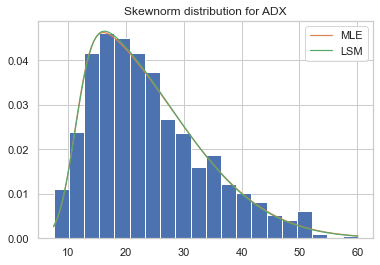

In [15]:
print(f'Parameters for Skewmorm distr. MLE: {parameters_mle}')
print(f'Parameters for Skewmorm distr. LSM: {parameters_lsm}')
pdf_plot(sub_df['ADX'], scipy.stats.skewnorm, parameters_mle, parameters_lsm, 'Skewnorm', 'ADX')

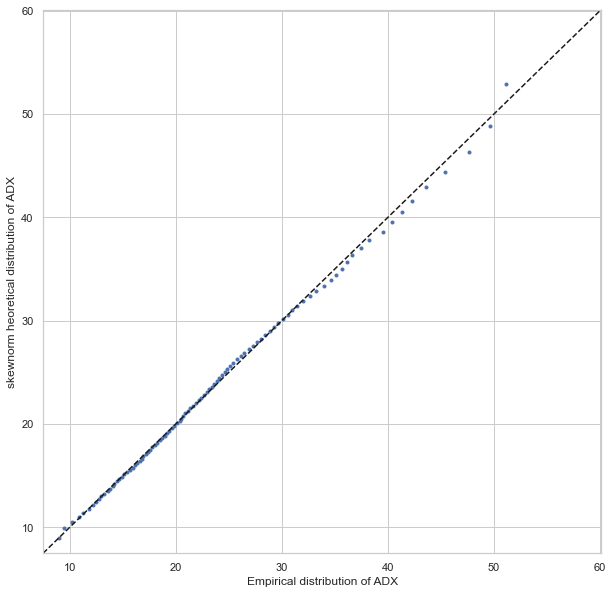

In [16]:
qq_biplot(sub_df, 'ADX', 'skewnorm', parameters_mle)

In [17]:
stat_test(sub_df, 'ADX', 'skewnorm', parameters_mle, scipy.stats.kstest)
stat_test(sub_df, 'ADX', 'skewnorm', parameters_mle, scipy.stats.cramervonmises)

print()

Statistical tests for ADX, skewnorm distr:
KstestResult(statistic=0.019414668771145505, pvalue=0.11842526436540857)


Statistical tests for ADX, skewnorm distr:
CramerVonMisesResult(statistic=0.18749765761082574, pvalue=0.2930655616315915)





##### Column 'Week' - Burr distribution

In [18]:
cdf_x, cdf_y = cdf_data(sub_df['Week'])

def parameters_week(data, distr):
    
    data_float = np.array(data, dtype = float) 
    parameters_mle = distr.fit(data_float)
    
    parameters_lsm, _ = scipy.optimize.curve_fit(lambda x, a, b, c, d: distr.cdf(x, a, b, c, d), cdf_x, cdf_y, p0 = parameters_mle, maxfev = 1000)
    
    return parameters_mle, parameters_lsm

parameters_mle, parameters_lsm = parameters_week(sub_df['Week'], scipy.stats.burr )

Parameters for Burr distr. MLE: (136.11596277059937, 0.0073850065490199054, 0.7195971324868102, 51.572407185877495)
Parameters for Burr distr. LSM: [1.65223160e+02 5.98612900e-03 2.95155968e-01 5.17343428e+01]


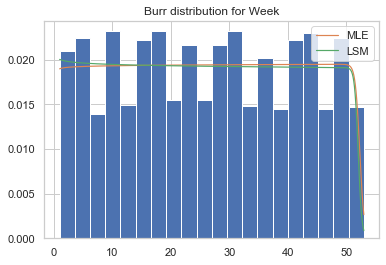

In [19]:
print(f'Parameters for Burr distr. MLE: {parameters_mle}')
print(f'Parameters for Burr distr. LSM: {parameters_lsm}')

pdf_plot(sub_df['Week'], scipy.stats.burr, parameters_mle, parameters_lsm, 'Burr', 'Week')

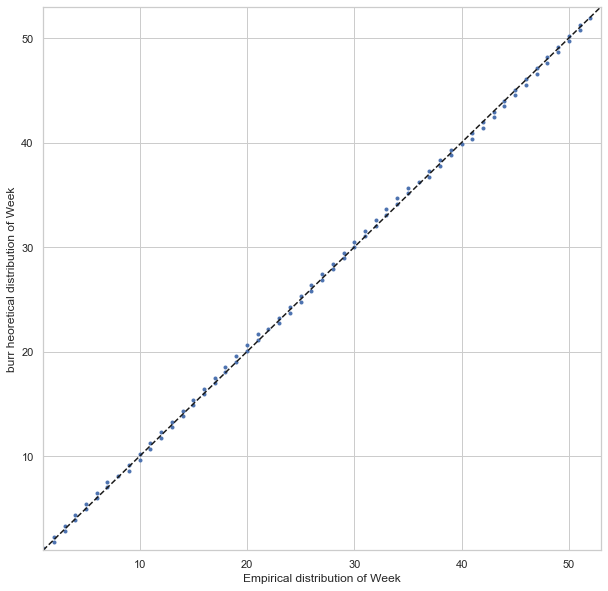

In [20]:
qq_biplot(sub_df, 'Week', 'burr', parameters_mle)

In [21]:
stat_test(sub_df, 'Week', 'burr', parameters_mle, scipy.stats.kstest)
stat_test(sub_df, 'Week', 'burr', parameters_mle, scipy.stats.cramervonmises)

print()

Statistical tests for Week, burr distr:
KstestResult(statistic=0.015153326136666978, pvalue=0.35468248546095094)


Statistical tests for Week, burr distr:
CramerVonMisesResult(statistic=0.15002478572475736, pvalue=0.38951380445741934)





##### Column 'ROC' - johnsonsu and norminvgauss distriburions

In [22]:
cdf_x, cdf_y = cdf_data(sub_df['ROC'])

def parameters_roc(data, distr):
    
    data_float = np.array(data, dtype = float) 
    parameters_mle = distr.fit(data_float)
    
    parameters_lsm, _ = scipy.optimize.curve_fit(lambda x, a, b, c, d: distr.cdf(x, a, b, c, d), cdf_x, cdf_y, p0 = parameters_mle, maxfev = 1000)
    
    return parameters_mle, parameters_lsm

parameters_mle, parameters_lsm = parameters_roc(sub_df['ROC'], scipy.stats.johnsonsu)
parameters_mle2, parameters_lsm2 = parameters_roc(sub_df['ROC'], scipy.stats.norminvgauss)

Parameters for johnsonsu distr. MLE: (0.23169710329036777, 1.4624214233618869, 1.7929553881729898, 5.177805788213719)
Parameters for johnsonsu distr. LSM: [0.23776516 1.3758399  1.81490794 4.80713513]


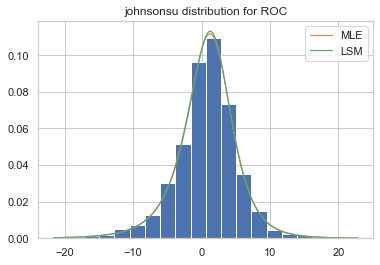

Parameters for norminvgauss distr. MLE: (1.0702872373093673, -0.16100499806006294, 1.4745725827533067, 4.659250303888202)
Parameters for norminvgauss distr. LSM: [ 1.05640572 -0.19081491  1.57892707  4.61873752]


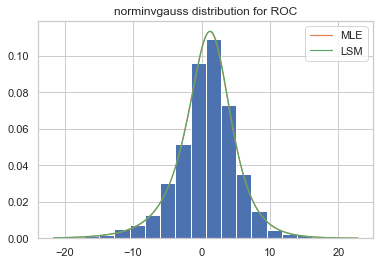

In [23]:
print(f'Parameters for johnsonsu distr. MLE: {parameters_mle}')
print(f'Parameters for johnsonsu distr. LSM: {parameters_lsm}')

pdf_plot(sub_df['ROC'], scipy.stats.johnsonsu, parameters_mle, parameters_lsm, 'johnsonsu', 'ROC')

print(f'Parameters for norminvgauss distr. MLE: {parameters_mle2}')
print(f'Parameters for norminvgauss distr. LSM: {parameters_lsm2}')

pdf_plot(sub_df['ROC'], scipy.stats.norminvgauss, parameters_mle2, parameters_lsm2, 'norminvgauss', 'ROC')


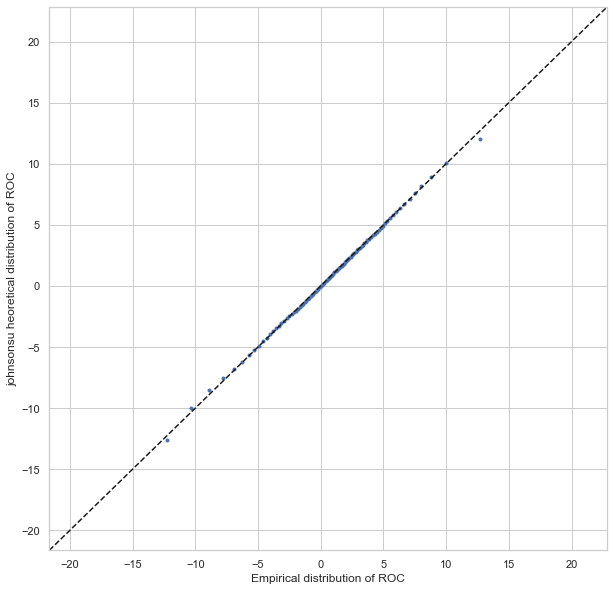

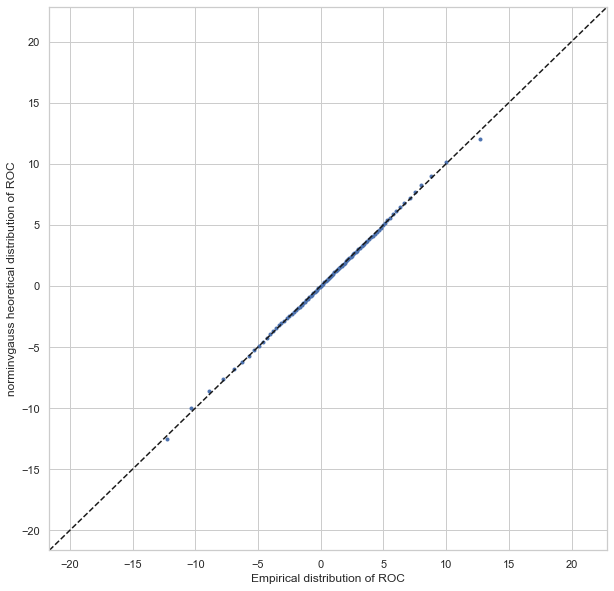

In [24]:
qq_biplot(sub_df, 'ROC', 'johnsonsu', parameters_mle)
qq_biplot(sub_df, 'ROC', 'norminvgauss', parameters_mle2)

In [25]:
stat_test(sub_df, 'ROC', 'johnsonsu', parameters_mle, scipy.stats.kstest)
stat_test(sub_df, 'ROC', 'johnsonsu', parameters_mle, scipy.stats.cramervonmises)


stat_test(sub_df, 'ROC', 'norminvgauss', parameters_mle2, scipy.stats.kstest)
stat_test(sub_df, 'ROC', 'norminvgauss', parameters_mle2, scipy.stats.cramervonmises)
print()

Statistical tests for ROC, johnsonsu distr:
KstestResult(statistic=0.006651842262134167, pvalue=0.9961531307599167)


Statistical tests for ROC, johnsonsu distr:
CramerVonMisesResult(statistic=0.025366821290844475, pvalue=0.9888193822608528)


Statistical tests for ROC, norminvgauss distr:
KstestResult(statistic=0.007238665665321747, pvalue=0.9889354788681484)


Statistical tests for ROC, norminvgauss distr:
CramerVonMisesResult(statistic=0.02122061072691269, pvalue=0.9957123721642178)





##### Column 'MCAD' - genhyperbolic distribution

In [26]:
cdf_x, cdf_y = cdf_data(sub_df['MACD'])

def parameters_mcad(data, distr):
    
    data_float = np.array(data, dtype = float) 
    parameters_mle = distr.fit(data_float)
    parameters_lsm, _ = scipy.optimize.curve_fit(lambda x, a, b, c, d, e: distr.cdf(x, a, b, c, d, e), cdf_x, cdf_y, p0 = parameters_mle, maxfev = 1000)
    
    return parameters_mle, parameters_lsm

parameters_mle, parameters_lsm = parameters_mcad(sub_df['MACD'], scipy.stats.genhyperbolic )


Parameters for genhyperbolic distr. MLE: (-0.5987539702748712, 0.2094416415676117, 0.12632525728500235, 0.09295792522153187, 0.42805138008980964)
Parameters for genhyperbolic distr. LSM: [-0.88738417  0.18135509  0.17835164  0.08269819  0.51938109]


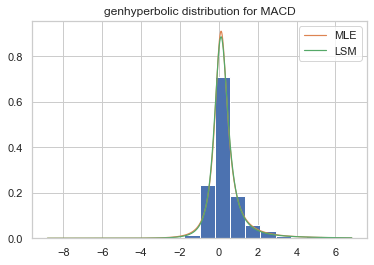

In [27]:
print(f'Parameters for genhyperbolic distr. MLE: {parameters_mle}')
print(f'Parameters for genhyperbolic distr. LSM: {parameters_lsm}')

pdf_plot(sub_df['MACD'], scipy.stats.genhyperbolic , parameters_mle, parameters_lsm, 'genhyperbolic', 'MACD')

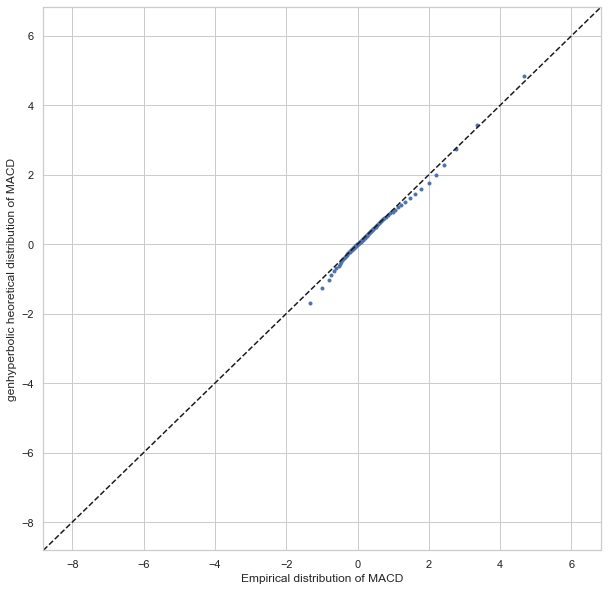

In [28]:
qq_biplot(sub_df, 'MACD', 'genhyperbolic', parameters_mle)

In [29]:
stat_test(sub_df, 'MACD', 'genhyperbolic', parameters_mle, scipy.stats.kstest)
stat_test(sub_df, 'MACD', 'genhyperbolic', parameters_mle, scipy.stats.cramervonmises)

print()

Statistical tests for MACD, genhyperbolic distr:
KstestResult(statistic=0.018150055389158502, pvalue=0.1689057673871065)


Statistical tests for MACD, genhyperbolic distr:
CramerVonMisesResult(statistic=0.2134686791313924, pvalue=0.24283489262275026)



